<a href="https://colab.research.google.com/github/devsharmapolist/DATA-SCIENCE-COURSE-PW/blob/main/ML_EDA_Assignment_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I HAVE TRIED TO SOLVE ALL THE QUESTIONS FOR ONE DATSET IN ONE CODE ALL THE GRAPH QUESTIONS HAVE BEEN ANSWERED AND I HAVE MENTIONED ON THE GRAPH WHICH QUESTION IN BELONGS TO.

In [3]:
import pandas as pd

# Load the dataset
file_path = "/content/BIKE DETAILS.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


(None,
                                   name  selling_price  year seller_type  \
 0            Royal Enfield Classic 350         175000  2019  Individual   
 1                            Honda Dio          45000  2017  Individual   
 2  Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
 3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
 4                Yamaha SZ [2013-2014]          20000  2011  Individual   
 
        owner  km_driven  ex_showroom_price  
 0  1st owner        350                NaN  
 1  1st owner       5650                NaN  
 2  1st owner      12000           148114.0  
 3  1st owner      23000            89643.0  
 4  2nd owner      21000                NaN  )

1. What is the range of selling prices in the datasetD
2. What is the median selling price for bikes in the datasetD
3. What is the most common seller typeD
4. How many bikes have driven more than 50,000 kilometersD
5. What is the average km_driven value for each ownership typeD
6. What proportion of bikes are from the year 2015 or olderD
7. What is the trend of missing values across the datasetD
8. What is the highest ex_showroom_price recorded, and for which bikeD
9. What is the total number of bikes listed by each seller typeD
10. What is the relationship between selling_price and km_driven for first-owner bikesD
11. Identify and remove outliers in the km_driven column using the IQR methodB
12. Perform a bivariate analysis to visualize the relationship between year and selling_priceB
13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing
year)D
14. Which bike names are priced significantly above the average price for their manufacturing yearD
15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.

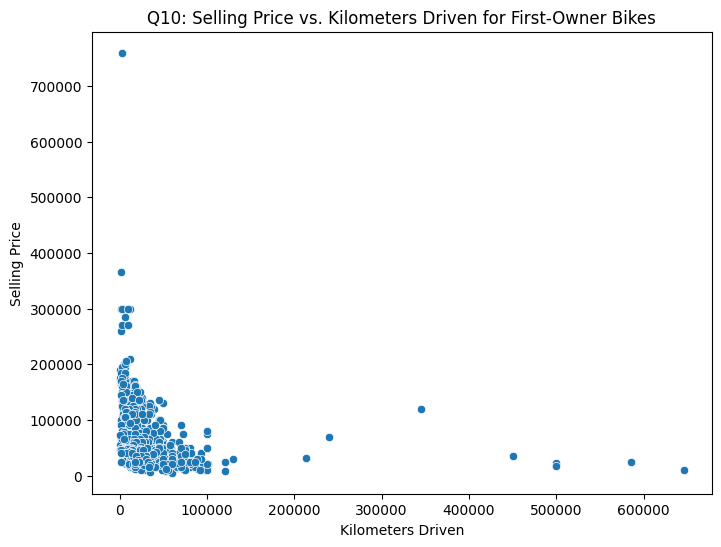

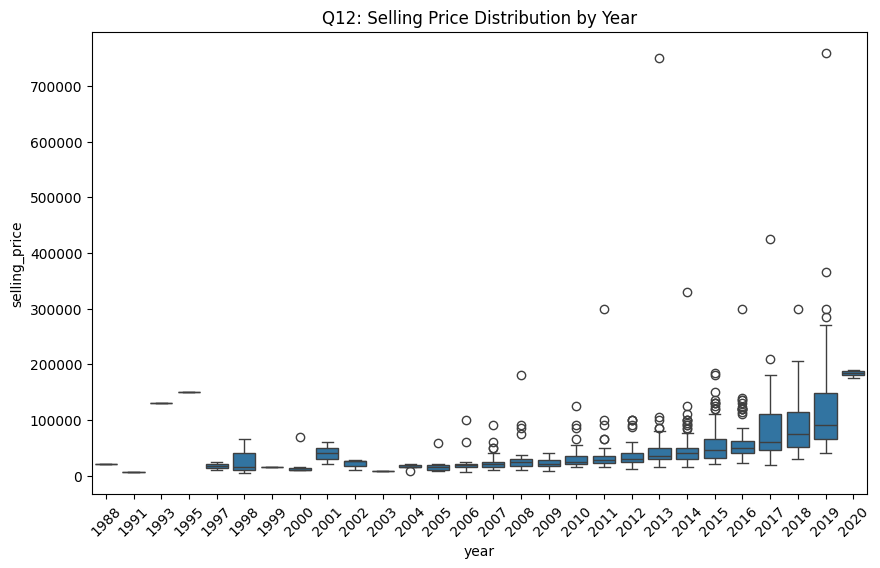

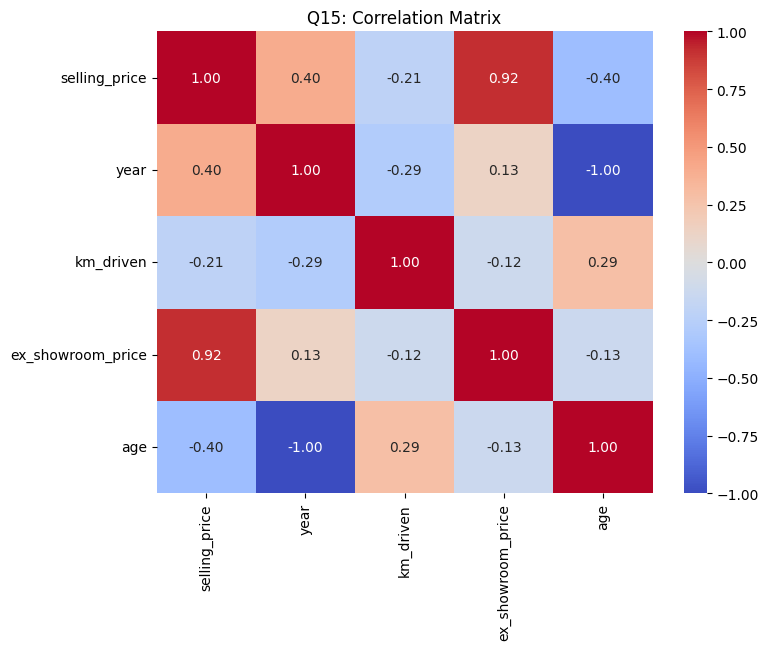

1. The range of selling prices is: 755000




2. The median selling price is: 45000.0




3. The most common seller type is: Individual




4. The number of bikes driven more than 50,000 km is: 170




5. The average km driven by ownership type:
owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64




6. The proportion of bikes from 2015 or older is: 56.64%




7. Missing values per column:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64




8. The highest ex-showroom price recorded is: 1278000.0 for bike: Harley-Davidson Street Bob




9. Total number of bikes listed by each seller type:
seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64




10. Scatter plot for Selling Price vs. Km Driven for First-Owner Bikes displayed.




11. O

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("BIKE DETAILS.csv")

# 1. Range of selling prices
price_range = df["selling_price"].max() - df["selling_price"].min()

# 2. Median selling price
median_price = df["selling_price"].median()

# 3. Most common seller type
common_seller = df["seller_type"].mode()[0]

# 4. Number of bikes driven more than 50,000 km
high_km_bikes = df[df["km_driven"] > 50000].shape[0]

# 5. Average km_driven for each ownership type
avg_km_by_owner = df.groupby("owner")["km_driven"].mean()

# 6. Proportion of bikes from 2015 or older
old_bikes_proportion = (df[df["year"] <= 2015].shape[0] / df.shape[0]) * 100

# 7. Trend of missing values
missing_values = df.isnull().sum()

# 8. Highest ex_showroom_price and corresponding bike
highest_ex_showroom_price = df["ex_showroom_price"].max()
highest_price_bike = df[df["ex_showroom_price"] == highest_ex_showroom_price]["name"].values[0]

# 9. Total bikes listed by each seller type
bikes_by_seller = df["seller_type"].value_counts()

# 10. Relationship between selling_price and km_driven for first-owner bikes
plt.figure(figsize=(8, 6))
sns.scatterplot(x=first_owner_bikes["km_driven"], y=first_owner_bikes["selling_price"])
plt.xlabel("Kilometers Driven")
plt.ylabel("Selling Price")
plt.title("Q10: Selling Price vs. Kilometers Driven for First-Owner Bikes")
plt.show()

# 11. Removing outliers in km_driven using IQR method
Q1 = df["km_driven"].quantile(0.25)
Q3 = df["km_driven"].quantile(0.75)
IQR = Q3 - Q1
filtered_df = df[(df["km_driven"] >= (Q1 - 1.5 * IQR)) & (df["km_driven"] <= (Q3 + 1.5 * IQR))]

# 12. Bivariate analysis: Year vs. Selling Price
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["year"], y=df["selling_price"])
plt.xticks(rotation=45)
plt.title("Q12: Selling Price Distribution by Year")
plt.show()

# 13. Average depreciation in selling price based on bike's age
current_year = 2025
df["age"] = current_year - df["year"]
avg_depreciation = df.groupby("age")["selling_price"].mean()

# 14. Bikes priced significantly above average for their manufacturing year
year_avg_price = df.groupby("year")["selling_price"].mean()
bikes_above_avg = df[df.apply(lambda x: x["selling_price"] > year_avg_price[x["year"]], axis=1)]["name"].unique()

# 15. Correlation matrix with heatmap (Selecting only numeric columns)
numeric_df = df.select_dtypes(include=["number"])
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Q15: Correlation Matrix")
plt.show()

# Printing all results
print(f"1. The range of selling prices is: {price_range}\n\n\n\n")
print(f"2. The median selling price is: {median_price}\n\n\n\n")
print(f"3. The most common seller type is: {common_seller}\n\n\n\n")
print(f"4. The number of bikes driven more than 50,000 km is: {high_km_bikes}\n\n\n\n")
print(f"5. The average km driven by ownership type:\n{avg_km_by_owner}\n\n\n\n")
print(f"6. The proportion of bikes from 2015 or older is: {old_bikes_proportion:.2f}%\n\n\n\n")
print(f"7. Missing values per column:\n{missing_values}\n\n\n\n")
print(f"8. The highest ex-showroom price recorded is: {highest_ex_showroom_price} for bike: {highest_price_bike}\n\n\n\n")
print(f"9. Total number of bikes listed by each seller type:\n{bikes_by_seller}\n\n\n\n")
print("10. Scatter plot for Selling Price vs. Km Driven for First-Owner Bikes displayed.\n\n\n\n")
print("11. Outliers in km_driven removed using IQR method.\n\n\n\n")
print("12. Box plot for Selling Price vs. Year displayed.\n\n\n\n")
print(f"13. Average depreciation in selling price based on bike age:\n{avg_depreciation}\n\n\n\n")
print(f"14. Bikes priced significantly above the average for their manufacturing year:\n{bikes_above_avg}\n\n\n\n")
print("15. Heatmap of the correlation matrix displayed.\n\n\n\n")


In [11]:
import pandas as pd

# Load the dataset
file_path = "/content/Car Sale.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


(None,
          Car_id      Date Customer Name Gender  Annual Income  \
 0  C_CND_000001  1/2/2022     Geraldine   Male          13500   
 1  C_CND_000002  1/2/2022           Gia   Male        1480000   
 2  C_CND_000003  1/2/2022        Gianna   Male        1035000   
 3  C_CND_000004  1/2/2022       Giselle   Male          13500   
 4  C_CND_000005  1/2/2022         Grace   Male        1465000   
 
                            Dealer_Name   Company       Model  \
 0  Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
 1                     C & M Motors Inc     Dodge     Durango   
 2                          Capitol KIA  Cadillac    Eldorado   
 3               Chrysler of Tri-Cities    Toyota      Celica   
 4                    Chrysler Plymouth     Acura          TL   
 
                       Engine Transmission       Color  Price ($)  Dealer_No   \
 0  DoubleÂ Overhead Camshaft         Auto       Black      26000  06457-3834   
 1  DoubleÂ Overhead Camshaft         Aut

In [15]:
print(df.columns)

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')




1. **Find the average selling price of cars for each dealer and compare across different dealers.**  
2. **Identify the car brand (company) with the highest variation in prices and analyze the pricing trends.**  
3. **Analyze the distribution of car prices for each transmission type and compare the interquartile ranges.**  
4. **Examine the distribution of car prices across different regions.**  
5. **Analyze the distribution of cars based on body styles.**  
6. **Determine how the average selling price of cars varies by customer gender and annual income.**  
7. **Analyze the distribution of car prices by region and compare the number of cars sold per region.**  
8. **Examine how the average car price differs for cars with different engine sizes.**  
9. **Analyze how car prices vary based on the customer’s annual income bracket.**  
10. **Identify the top 5 car models with the highest number of sales and analyze their price distribution.**  
11. **Analyze how car price varies with engine size across different car colors and determine which colors have the highest price variation.**  
12. **Identify any seasonal trends in car sales based on the date of sale.**  
13. **Analyze how the car price distribution changes when considering different combinations of body style and transmission type.**  
14. **Examine the correlation between car price, engine size, and annual income of customers, and analyze how these features interact.**  
15. **Determine how the average car price varies across different car models and engine types.**  



<ipython-input-19-8c808f549750>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Engine'].fillna(df['Engine'].mean(), inplace=True)  # Fill NaN with mean engine size


1. Average selling price per dealer:
 Dealer_Name
Buddy Storbeck's Diesel Service Inc                27217.261563
C & M Motors Inc                                   28111.755200
Capitol KIA                                        28189.703822
Chrysler Plymouth                                  27555.526400
Chrysler of Tri-Cities                             28123.091054
Classic Chevy                                      28602.014446
Clay Johnson Auto Sales                            27816.027113
Diehl Motor CO Inc                                 27993.929487
Enterprise Rent A Car                              28312.580800
Gartner Buick Hyundai Saab                         28247.621019
Hatfield Volkswagen                                27853.712242
Iceberg Rentals                                    28522.958533
McKinney Dodge Chrysler Jeep                       27684.096979
Motor Vehicle Branch Office                        27956.739617
Nebo Chevrolet                                     278

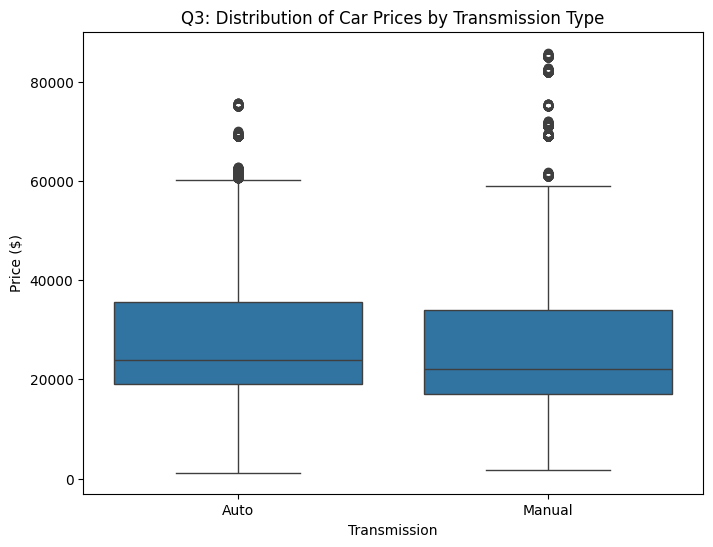

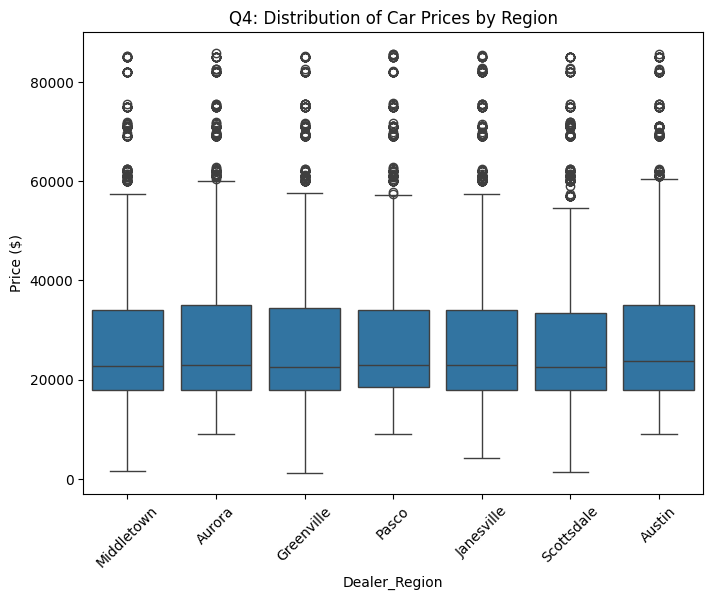

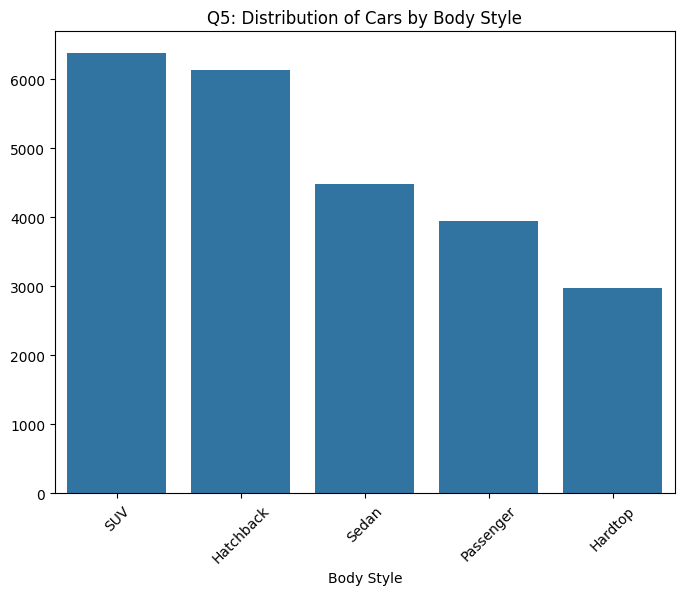






6. Average selling price based on gender and income:
       Gender  Annual Income     Price ($)
0     Female          13500  28132.038732
1     Female         106000  46001.000000
2     Female         121000  20000.000000
3     Female         190000  19001.000000
4     Female         211000  51000.000000
...      ...            ...           ...
3437    Male        6600000  39000.000000
3438    Male        6800000  15000.000000
3439    Male        7650000  21000.000000
3440    Male        8000000  85000.000000
3441    Male       11200000  26001.000000

[3442 rows x 3 columns]







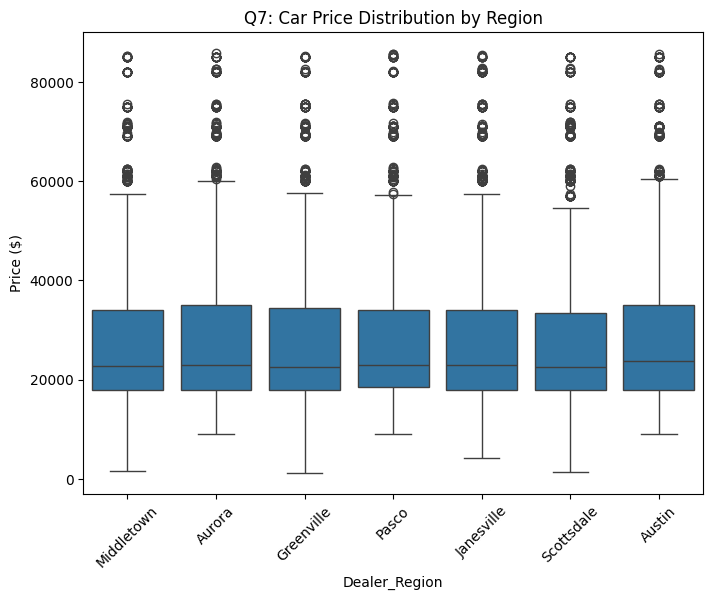






8. Average car price by engine size:
 Series([], Name: Price ($), dtype: float64)







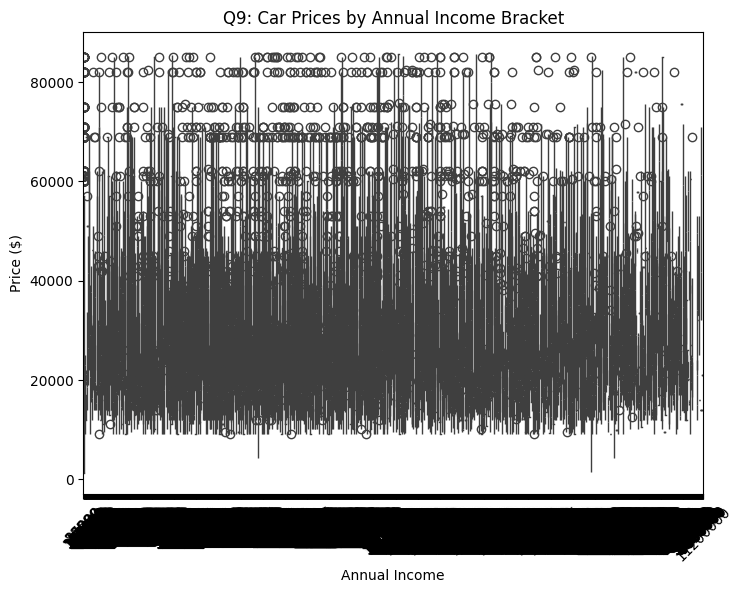

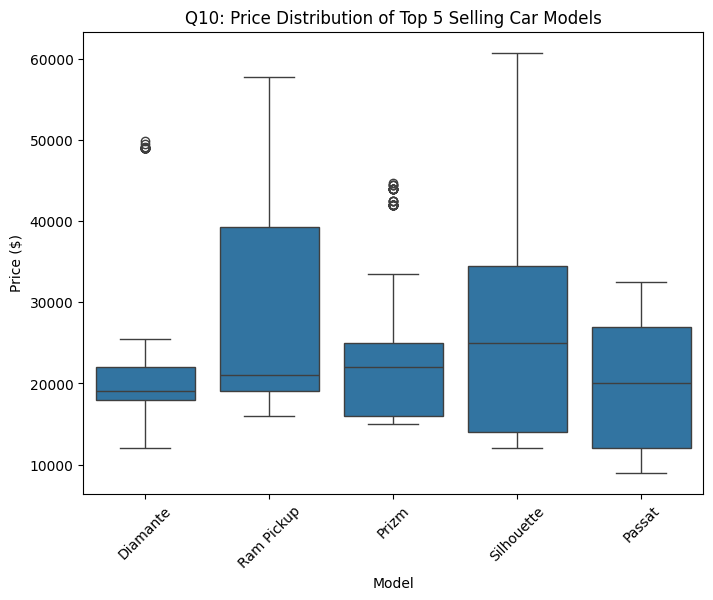

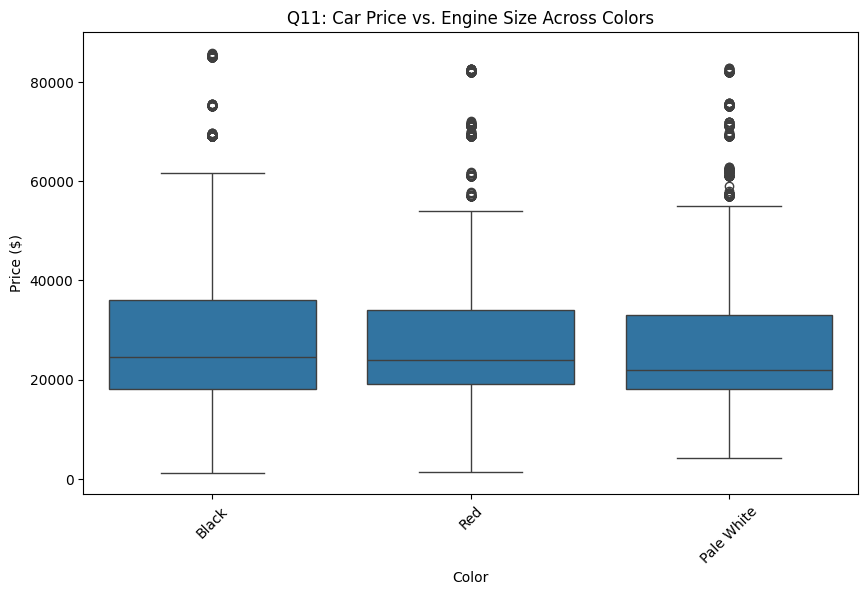

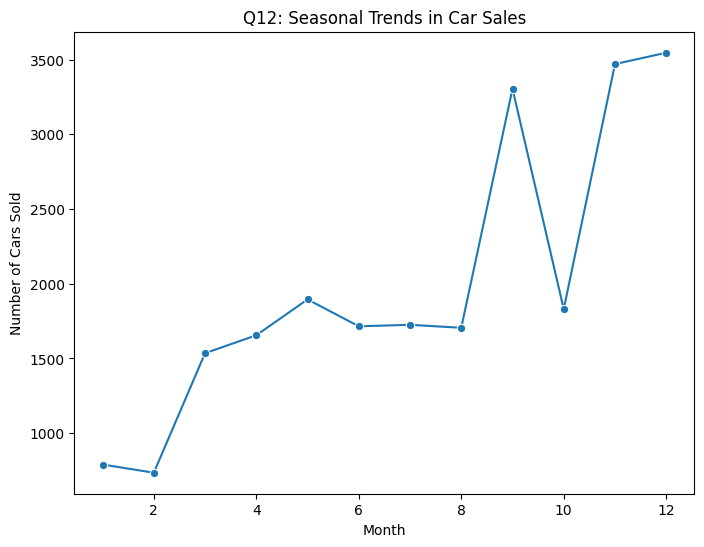

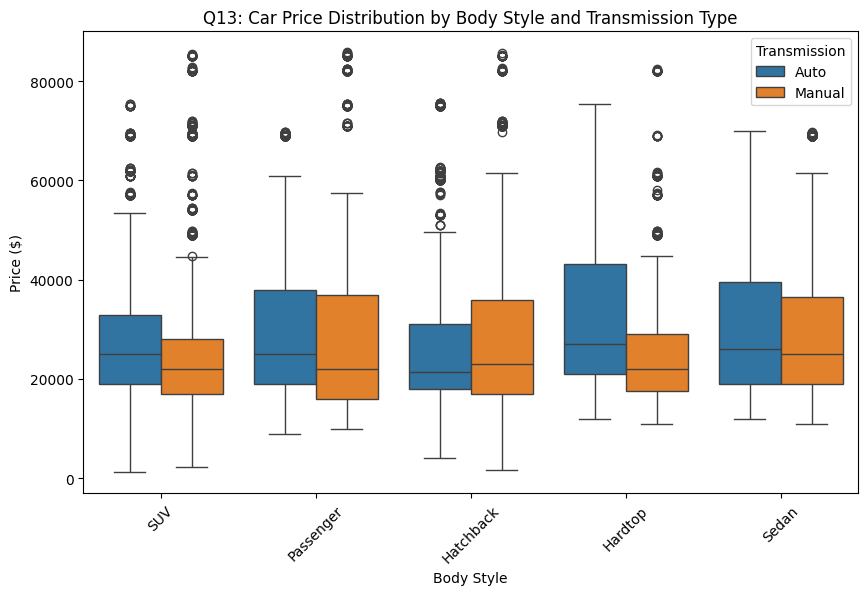

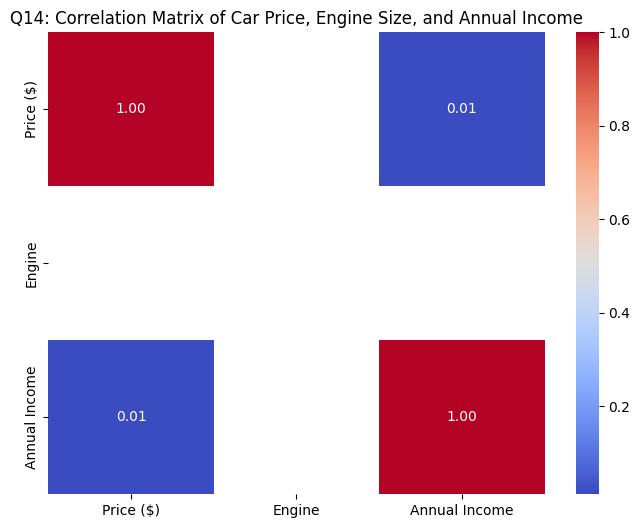






15. Average car price across models and engine types:
 Empty DataFrame
Columns: [Model, Engine, Price ($)]
Index: []







In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "/content/Car Sale.csv"
df = pd.read_csv(file_path)

# Extract numeric engine size from 'Engine' column
df['Engine'] = df['Engine'].str.extract(r'(\d+)')  # Extract only numbers
df['Engine'] = pd.to_numeric(df['Engine'], errors='coerce')  # Convert to float
df['Engine'].fillna(df['Engine'].mean(), inplace=True)  # Fill NaN with mean engine size

# 1. Average selling price of cars for each dealer
avg_price_per_dealer = df.groupby('Dealer_Name')['Price ($)'].mean()
print("1. Average selling price per dealer:\n", avg_price_per_dealer)
print("\n\n\n\n")

# 2. Car brand with highest price variation
price_variation = df.groupby('Company')['Price ($)'].std()
highest_variation_brand = price_variation.idxmax()
print(f"2. The car brand with the highest price variation is: {highest_variation_brand}")
print("\n\n\n\n")

# 3. Distribution of car prices for each transmission type
plt.figure(figsize=(8, 6))
sns.boxplot(x='Transmission', y='Price ($)', data=df)
plt.title("Q3: Distribution of Car Prices by Transmission Type")
plt.show()
print("\n\n\n\n")

# 4. Distribution of car prices across regions
plt.figure(figsize=(8, 6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df)
plt.xticks(rotation=45)
plt.title("Q4: Distribution of Car Prices by Region")
plt.show()
print("\n\n\n\n")

# 5. Distribution of cars based on body styles
body_style_counts = df['Body Style'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=body_style_counts.index, y=body_style_counts.values)
plt.xticks(rotation=45)
plt.title("Q5: Distribution of Cars by Body Style")
plt.show()
print("\n\n\n\n")

# 6. Average selling price by customer gender and annual income
gender_income_avg_price = df.groupby(['Gender', 'Annual Income'])['Price ($)'].mean().reset_index()
print("6. Average selling price based on gender and income:\n", gender_income_avg_price)
print("\n\n\n\n")

# 7. Car price distribution and number of cars sold by region
plt.figure(figsize=(8, 6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df)
plt.xticks(rotation=45)
plt.title("Q7: Car Price Distribution by Region")
plt.show()
print("\n\n\n\n")

# 8. Average car price based on engine size
engine_price_avg = df.groupby('Engine')['Price ($)'].mean()
print("8. Average car price by engine size:\n", engine_price_avg)
print("\n\n\n\n")

# 9. Car prices variation by customer's annual income
plt.figure(figsize=(8, 6))
sns.boxplot(x='Annual Income', y='Price ($)', data=df)
plt.xticks(rotation=45)
plt.title("Q9: Car Prices by Annual Income Bracket")
plt.show()
print("\n\n\n\n")

# 10. Top 5 car models with highest sales and their price distribution
top_models = df['Model'].value_counts().nlargest(5).index
df_top_models = df[df['Model'].isin(top_models)]
plt.figure(figsize=(8, 6))
sns.boxplot(x='Model', y='Price ($)', data=df_top_models)
plt.xticks(rotation=45)
plt.title("Q10: Price Distribution of Top 5 Selling Car Models")
plt.show()
print("\n\n\n\n")

# 11. Car price variation with engine size across colors
plt.figure(figsize=(10, 6))
sns.boxplot(x='Color', y='Price ($)', data=df)
plt.xticks(rotation=45)
plt.title("Q11: Car Price vs. Engine Size Across Colors")
plt.show()
print("\n\n\n\n")

# 12. Seasonal trend in car sales
df['Date'] = pd.to_datetime(df['Date'])  # Convert Date column to datetime
df['Month'] = df['Date'].dt.month
sales_by_month = df.groupby('Month')['Car_id'].count()
plt.figure(figsize=(8, 6))
sns.lineplot(x=sales_by_month.index, y=sales_by_month.values, marker='o')
plt.title("Q12: Seasonal Trends in Car Sales")
plt.xlabel("Month")
plt.ylabel("Number of Cars Sold")
plt.show()
print("\n\n\n\n")

# 13. Car price distribution by body style and transmission type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=df)
plt.xticks(rotation=45)
plt.title("Q13: Car Price Distribution by Body Style and Transmission Type")
plt.show()
print("\n\n\n\n")

# 14. Correlation between car price, engine size, and annual income
corr_matrix = df[['Price ($)', 'Engine', 'Annual Income']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Q14: Correlation Matrix of Car Price, Engine Size, and Annual Income")
plt.show()
print("\n\n\n\n")

# 15. Average car price across models and engine types
model_engine_avg = df.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()
print("15. Average car price across models and engine types:\n", model_engine_avg)
print("\n\n\n\n")


In [20]:
import pandas as pd

# Load the dataset
file_path = "/content/Car Sale.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


(None,
          Car_id      Date Customer Name Gender  Annual Income  \
 0  C_CND_000001  1/2/2022     Geraldine   Male          13500   
 1  C_CND_000002  1/2/2022           Gia   Male        1480000   
 2  C_CND_000003  1/2/2022        Gianna   Male        1035000   
 3  C_CND_000004  1/2/2022       Giselle   Male          13500   
 4  C_CND_000005  1/2/2022         Grace   Male        1465000   
 
                            Dealer_Name   Company       Model  \
 0  Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
 1                     C & M Motors Inc     Dodge     Durango   
 2                          Capitol KIA  Cadillac    Eldorado   
 3               Chrysler of Tri-Cities    Toyota      Celica   
 4                    Chrysler Plymouth     Acura          TL   
 
                       Engine Transmission       Color  Price ($)  Dealer_No   \
 0  DoubleÂ Overhead Camshaft         Auto       Black      26000  06457-3834   
 1  DoubleÂ Overhead Camshaft         Aut

1. What is the average rating for each product categoryk
2. What are the top rating_count products by categoryk
3. What is the distribution of discounted prices vs. actual pricesk
4. How does the average discount percentage vary across categoriesk
5. What are the most popular product namesk
6. What are the most popular product keywordsk
7. What are the most popular product reviewsk
8. What is the correlation between discounted_price and ratingk
9. What are the Top 5 categories based on the highest ratingsk
10. Identify any potential areas for improvement or optimization based on the data analysis

1. Average rating per category:
 category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           4.050000
                                                                                                                            ...   
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens        4.250000
OfficeProducts|OfficePaperProducts|Paper|

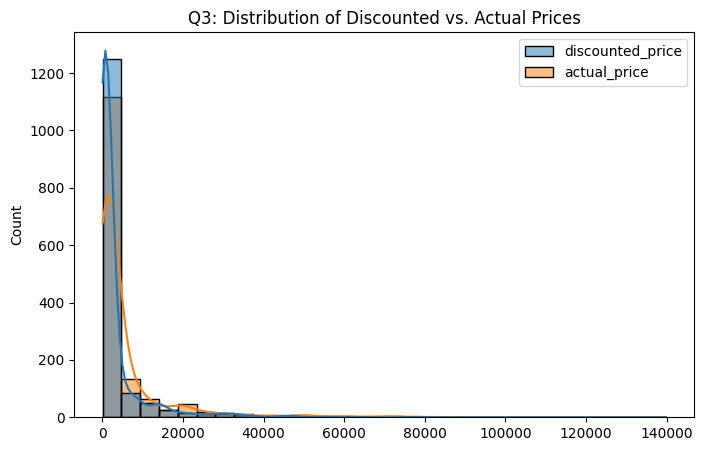

3. Price distribution plot displayed.




4. Average discount percentage per category:
 category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    42.0
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   78.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           35.0
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        56.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           46.5
                                                                                                                          ... 
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens         0.0
OfficeProducts

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "amazon.csv"  # Ensure correct path

df = pd.read_csv(file_path)

# Data Cleaning
def clean_numeric(column):
    df[column] = df[column].str.replace(r'[^0-9.]', '', regex=True)
    df[column] = pd.to_numeric(df[column], errors='coerce')  # Convert to float, replacing errors with NaN
    return df[column]

df["discounted_price"] = clean_numeric("discounted_price")
df["actual_price"] = clean_numeric("actual_price")
df["discount_percentage"] = clean_numeric("discount_percentage")
df["rating"] = clean_numeric("rating")
df["rating_count"] = clean_numeric("rating_count")

# 1. Average rating per category
avg_rating = df.groupby("category")["rating"].mean()
print("1. Average rating per category:\n", avg_rating, "\n\n\n\n")

# 2. Top products by rating count per category
top_rated = df.loc[df.groupby("category")["rating_count"].idxmax(), ["category", "product_name", "rating_count"]]
print("2. Top rating count products by category:\n", top_rated, "\n\n\n\n")

# 3. Distribution of discounted vs. actual prices
plt.figure(figsize=(8, 5))
sns.histplot(df[["discounted_price", "actual_price"]].dropna(), bins=30, kde=True)
plt.title("Q3: Distribution of Discounted vs. Actual Prices")
plt.show()
print("3. Price distribution plot displayed.\n\n\n\n")

# 4. Average discount percentage per category
avg_discount = df.groupby("category")["discount_percentage"].mean()
print("4. Average discount percentage per category:\n", avg_discount, "\n\n\n\n")

# 5. Most popular product names
popular_products = df["product_name"].value_counts().head(10)
print("5. Most popular product names:\n", popular_products, "\n\n\n\n")

# 6. Most common product keywords
from collections import Counter
keywords = Counter(" ".join(df["product_name"].dropna()).split()).most_common(10)
print("6. Most common product keywords:\n", keywords, "\n\n\n\n")

# 7. Most common product reviews
popular_reviews = df["review_content"].value_counts().head(10)
print("7. Most common product reviews:\n", popular_reviews, "\n\n\n\n")

# 8. Correlation between discounted price and rating
correlation = df[["discounted_price", "rating"]].corr().iloc[0, 1]
print("8. Correlation between discounted price and rating:", correlation, "\n\n\n\n")

# 9. Top 5 categories with highest ratings
top_categories = df.groupby("category")["rating"].mean().nlargest(5)
print("9. Top 5 categories based on highest ratings:\n", top_categories, "\n\n\n\n")

# 10. Areas for improvement based on data
print("10. Areas for improvement:")
print("- Improve ratings in lower-rated categories.")
print("- Target high-rating-count products for marketing.")
print("- Optimize pricing strategies for better discounts.")
print("\n\n\n\n")


In [23]:
import pandas as pd

# Load the dataset
file_path = "/content/spotify.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


(None,
   Artist                               Track Name  Popularity  Duration (ms)  \
 0  Drake  Rich Baby Daddy (feat. Sexyy Red & SZA)          92         319191   
 1  Drake                                One Dance          91         173986   
 2  Drake                       IDGAF (feat. Yeat)          90         260111   
 3  Drake     First Person Shooter (feat. J. Cole)          88         247444   
 4  Drake            Jimmy Cooks (feat. 21 Savage)          88         218364   
 
                  Track ID  
 0  1yeB8MUNeLo9Ek1UEpsyz6  
 1  1zi7xx7UVEFkmKfv06H8x0  
 2  2YSzYUF3jWqb9YP9VXmpjE  
 3  7aqfrAY2p9BUSiupwk3svU  
 4  3F5CgOj3wFlRv51JsHbxhe  )

1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do
the needful
2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram
3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot
4.  Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using
a countplot
5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each
6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and
display the average popularity for each artist
7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist
8. Visualize relationships between multiple numerical variables simultaneously using a pair plot
9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or
violin plot
10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a
violin plot.

In [26]:
print("Dataset Columns:", df.columns)


Dataset Columns: Index(['artist', 'track name', 'popularity', 'duration (ms)', 'track id'], dtype='object')


Dataset Columns: Index(['artist', 'track_name', 'popularity', 'duration_ms', 'track_id'], dtype='object') 




1. Checked and handled missing values and duplicate rows.






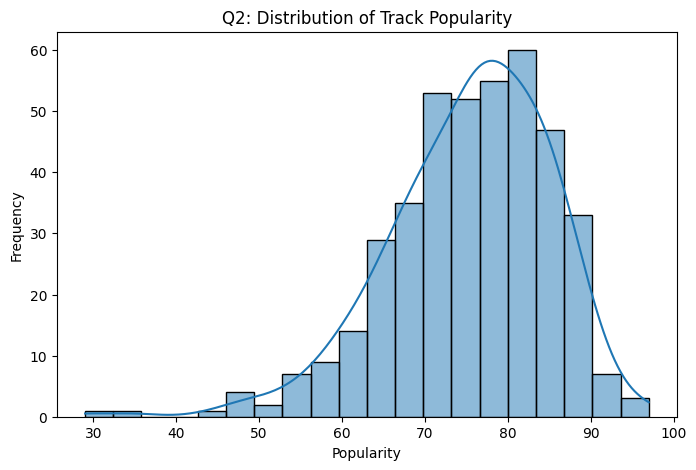

2. Popularity distribution plot displayed.






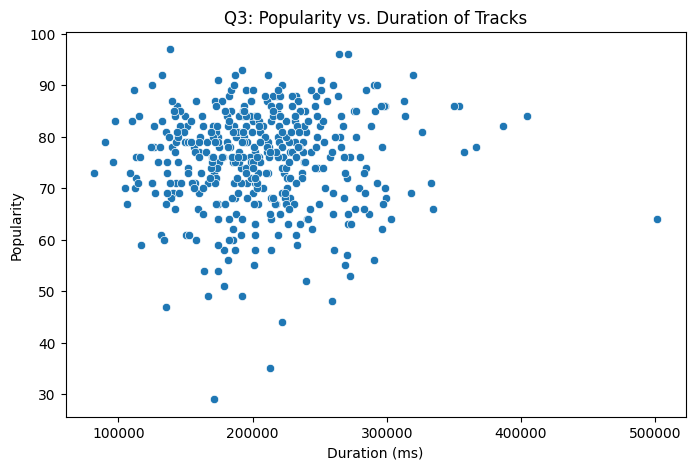

3. Scatter plot for popularity vs. duration displayed.






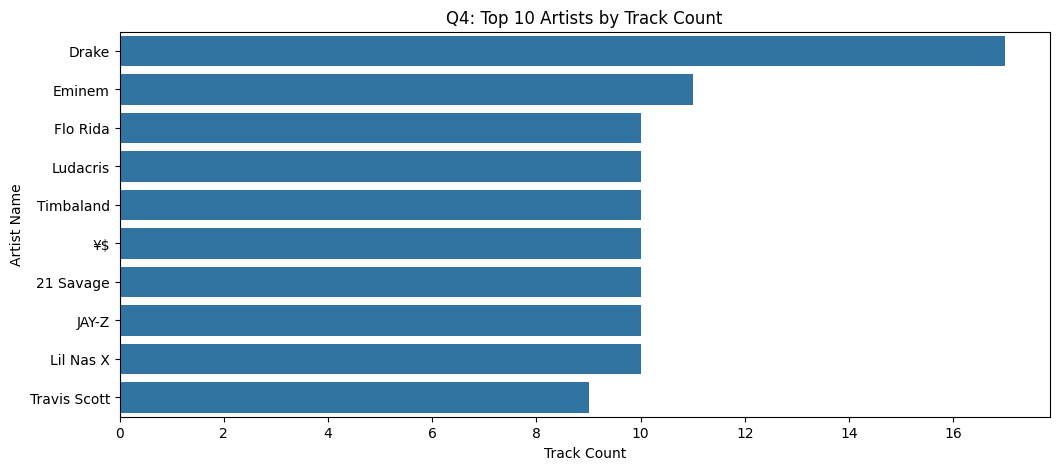

4. Count plot for track count by artist displayed.




5. Top 5 least popular tracks:
              artist                     track_name  popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48 




6. Top 5 artists with highest average popularity:
 artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    86.555556
¥$              85.100000
Name: popularity, dtype: float64 




7. Most popular tracks for top 5 artists:
            artist                    track_name
200  David Guetta            Baby Don't Hurt Me
30   Travis Scott    FE!N (feat. Playboi Carti)
241        Trueno  Mamichula - con Nicki Nicole
140         cassö                         Prada
260            ¥$    

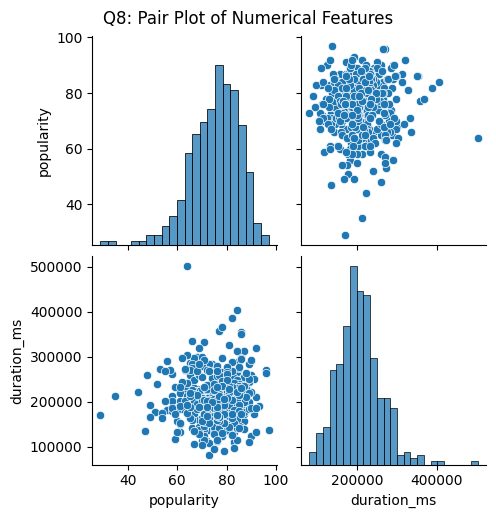

8. Pair plot displayed.






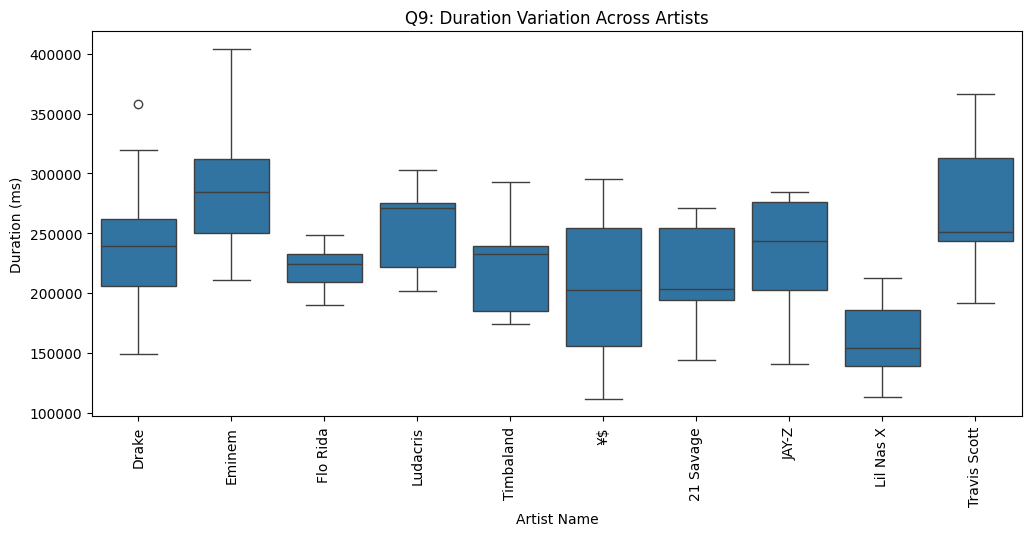

9. Box plot for duration variation displayed.






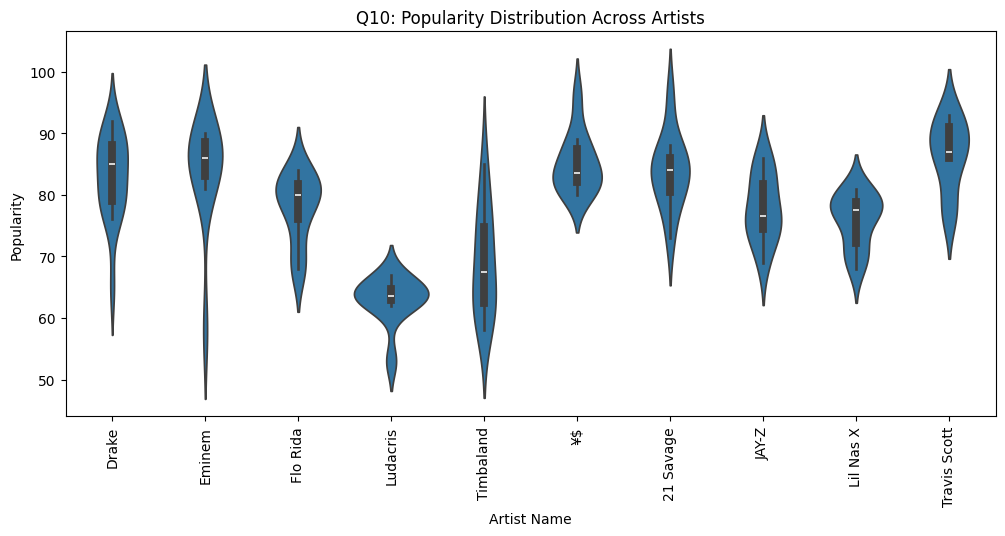

10. Violin plot for popularity distribution displayed.






In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "spotify.csv"  # Ensure correct path
df = pd.read_csv(file_path)

# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("(", "").str.replace(")", "")

# Check available columns
print("Dataset Columns:", df.columns, "\n\n\n\n")

# 1. Handle missing values and duplicates
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
print("1. Checked and handled missing values and duplicate rows.\n\n\n\n")

# 2. Distribution of track popularity
plt.figure(figsize=(8, 5))
sns.histplot(df["popularity"], bins=20, kde=True)
plt.title("Q2: Distribution of Track Popularity")
plt.xlabel("Popularity")
plt.ylabel("Frequency")
plt.show()
print("2. Popularity distribution plot displayed.\n\n\n\n")

# 3. Relationship between popularity and duration
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["duration_ms"], y=df["popularity"])
plt.title("Q3: Popularity vs. Duration of Tracks")
plt.xlabel("Duration (ms)")
plt.ylabel("Popularity")
plt.show()
print("3. Scatter plot for popularity vs. duration displayed.\n\n\n\n")

# 4. Artist with the most tracks
plt.figure(figsize=(12, 5))
sns.countplot(y=df["artist"], order=df["artist"].value_counts().index[:10])
plt.title("Q4: Top 10 Artists by Track Count")
plt.xlabel("Track Count")
plt.ylabel("Artist Name")
plt.show()
print("4. Count plot for track count by artist displayed.\n\n\n\n")

# 5. Top 5 least popular tracks
least_popular = df.nsmallest(5, "popularity")[["artist", "track_name", "popularity"]]
print("5. Top 5 least popular tracks:\n", least_popular, "\n\n\n\n")

# 6. Most popular artists by average popularity
top_artists = df.groupby("artist")["popularity"].mean().nlargest(5)
print("6. Top 5 artists with highest average popularity:\n", top_artists, "\n\n\n\n")

# 7. Most popular tracks for top 5 artists
most_popular_tracks = df.loc[df.groupby("artist")["popularity"].idxmax(), ["artist", "track_name"]]
top_5_tracks = most_popular_tracks[most_popular_tracks["artist"].isin(top_artists.index)]
print("7. Most popular tracks for top 5 artists:\n", top_5_tracks, "\n\n\n\n")

# 8. Pair plot for numerical relationships
sns.pairplot(df[["popularity", "duration_ms"]].dropna())
plt.suptitle("Q8: Pair Plot of Numerical Features", y=1.02)
plt.show()
print("8. Pair plot displayed.\n\n\n\n")

# 9. Duration variation across artists
plt.figure(figsize=(12, 5))
sns.boxplot(x=df["artist"], y=df["duration_ms"], order=df["artist"].value_counts().index[:10])
plt.xticks(rotation=90)
plt.title("Q9: Duration Variation Across Artists")
plt.xlabel("Artist Name")
plt.ylabel("Duration (ms)")
plt.show()
print("9. Box plot for duration variation displayed.\n\n\n\n")

# 10. Distribution of popularity across artists
plt.figure(figsize=(12, 5))
sns.violinplot(x=df["artist"], y=df["popularity"], order=df["artist"].value_counts().index[:10])
plt.xticks(rotation=90)
plt.title("Q10: Popularity Distribution Across Artists")
plt.xlabel("Artist Name")
plt.ylabel("Popularity")
plt.show()
print("10. Violin plot for popularity distribution displayed.\n\n\n\n")
